In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from RNN_model import Simple_RNN
import utils_2 as ut2



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file7_080124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,0.134180,0.023473,0.002203,0.002203-0.001490j,0.002659,-0.594742,-0.051439
1,0.135824,0.025117,0.002051,0.002051+0.000170j,0.002058,0.082612,-0.020024
2,0.136482,0.025775,0.001900,0.001900+0.000303j,0.001924,0.158163,0.009547
3,0.137797,0.027090,0.001749,0.001749+0.000903j,0.001969,0.476669,0.035605
4,0.137797,0.027090,0.001599,0.001599+0.000993j,0.001882,0.555726,0.056848


In [3]:
amplitudes = df['Amplitude'][300:50000].values
scale = MinMaxScaler(feature_range=(-1, 1))
amplitudes = scale.fit_transform(amplitudes.reshape(-1, 1))
#amplitudes = amplitudes.reshape(-1,1)
amplitudes.shape


(49700, 1)

### **prepare data**

In [7]:
amplitudes = df['Amplitude'][300:50000].values
scale = MinMaxScaler(feature_range=(-1, 1))
amplitudes = scale.fit_transform(amplitudes.reshape(-1, 1))
#amplitudes = amplitudes.reshape(-1,1)
amplitudes.shape

(49700, 1)

In [38]:
x,y = ut2.create_data(amplitudes, 1000)
x_train, y_train, x_test, y_test = ut2.split_data(x, y, 0.7)

print('shape of x_train, x_test, y_train, y_test:',)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

shape of x_train, x_test, y_train, y_test:


((34090, 1000, 1), (14610, 1000, 1), (34090, 1), (14610, 1))

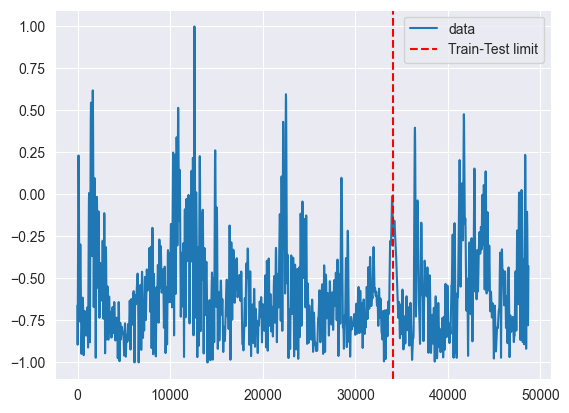

In [39]:
plt.plot(np.vstack((y_train,y_test)))
plt.axvline(int(len(x)*0.7), color = 'r', linestyle = '--')
plt.legend(['data', 'Train-Test limit'])
plt.show()

In [40]:
#tensores
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

## **Red**

In [41]:
in_size = x.shape[-1]
out_size = in_size
hid_size = 3
num_layers = 1


model = Simple_RNN(in_size, hid_size, out_size, num_layers)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [42]:
train_loss, test_loss = ut2.train_model(model,
               criterion,
               optimizer,
               x_train,
               x_test,
               y_train,
               y_test,
               epochs=100)

  5%|▌         | 5/100 [00:08<02:46,  1.75s/it]

Epoch :0.05    Train Loss :0.12290555983781815    Test Loss :0.11009371280670166


 10%|█         | 10/100 [00:17<02:34,  1.72s/it]

Epoch :0.1    Train Loss :0.0878509134054184    Test Loss :0.08335735648870468


 15%|█▌        | 15/100 [00:26<02:28,  1.74s/it]

Epoch :0.15    Train Loss :0.0744529664516449    Test Loss :0.07613673061132431


 20%|██        | 20/100 [00:34<02:18,  1.73s/it]

Epoch :0.2    Train Loss :0.0734717920422554    Test Loss :0.07829125225543976


 25%|██▌       | 25/100 [00:43<02:09,  1.72s/it]

Epoch :0.25    Train Loss :0.07478885352611542    Test Loss :0.08011948317289352


 30%|███       | 30/100 [00:52<02:01,  1.73s/it]

Epoch :0.3    Train Loss :0.07301894575357437    Test Loss :0.07773083448410034


 35%|███▌      | 35/100 [01:00<01:51,  1.72s/it]

Epoch :0.35    Train Loss :0.06835237145423889    Test Loss :0.07249633967876434


 40%|████      | 40/100 [01:09<01:44,  1.74s/it]

Epoch :0.4    Train Loss :0.06225693225860596    Test Loss :0.06630472093820572


 45%|████▌     | 45/100 [01:18<01:35,  1.73s/it]

Epoch :0.45    Train Loss :0.05487377569079399    Test Loss :0.05870473384857178


 50%|█████     | 50/100 [01:26<01:27,  1.76s/it]

Epoch :0.5    Train Loss :0.045346710830926895    Test Loss :0.048148591071367264


 55%|█████▌    | 55/100 [01:35<01:16,  1.70s/it]

Epoch :0.55    Train Loss :0.03443874418735504    Test Loss :0.035660743713378906


 60%|██████    | 60/100 [01:44<01:12,  1.82s/it]

Epoch :0.6    Train Loss :0.023581111803650856    Test Loss :0.023753324523568153


 65%|██████▌   | 65/100 [01:53<01:00,  1.74s/it]

Epoch :0.65    Train Loss :0.014493387192487717    Test Loss :0.014644137583673


 70%|███████   | 70/100 [02:02<00:52,  1.75s/it]

Epoch :0.7    Train Loss :0.00922836922109127    Test Loss :0.009629675187170506


 75%|███████▌  | 75/100 [02:10<00:42,  1.68s/it]

Epoch :0.75    Train Loss :0.007165653631091118    Test Loss :0.0076515632681548595


 80%|████████  | 80/100 [02:19<00:35,  1.77s/it]

Epoch :0.8    Train Loss :0.006399716250598431    Test Loss :0.006944276392459869


 85%|████████▌ | 85/100 [02:28<00:26,  1.79s/it]

Epoch :0.85    Train Loss :0.005547827109694481    Test Loss :0.005849949084222317


 90%|█████████ | 90/100 [02:37<00:17,  1.73s/it]

Epoch :0.9    Train Loss :0.004603296983987093    Test Loss :0.004738135263323784


 95%|█████████▌| 95/100 [02:46<00:08,  1.80s/it]

Epoch :0.95    Train Loss :0.003847309621050954    Test Loss :0.003957133274525404


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]

Epoch :1.0    Train Loss :0.0033772480674088    Test Loss :0.0034241504035890102


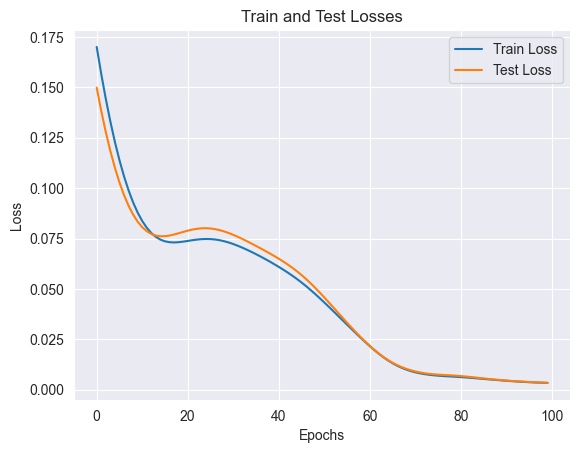

In [43]:
# Plot train and test losses
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

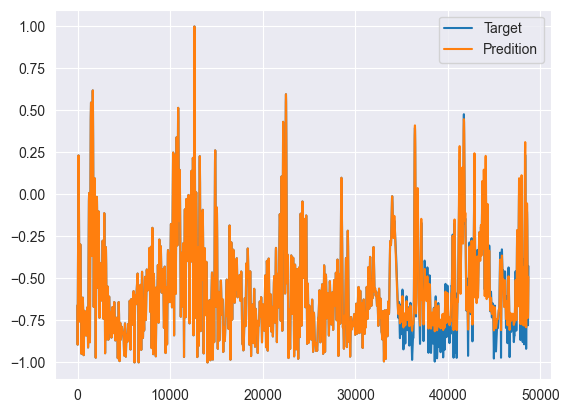

In [44]:
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy())),label='Target') 
plt.plot(np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy())),label='Predition') 
#plt.axvline(int(len(x)*0.8)) 
plt.legend()
plt.show()

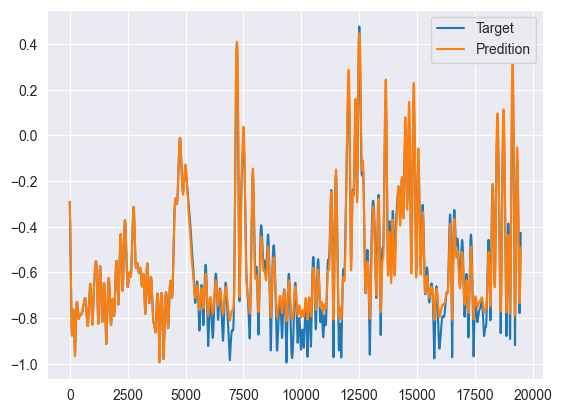

In [45]:
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy()))[int(len(x)*0.6):],label='Target') 
plt.plot(np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy()))[int(len(x)*0.6):],label='Predition')
plt.title('')
#plt.axvline(int(len(x)*0.8)) 
plt.legend()
plt.show()

In [46]:
train_loss2, test_loss2 = ut2.train_model(model,
               criterion,
               optimizer,
               x_train,
               x_test,
               y_train,
               y_test,
               epochs=200)

  2%|▎         | 5/200 [00:08<05:37,  1.73s/it]

Epoch :0.025    Train Loss :0.003079386195167899    Test Loss :0.003072071587666869


  5%|▌         | 10/200 [00:18<06:03,  1.91s/it]

Epoch :0.05    Train Loss :0.0028441627509891987    Test Loss :0.0028127094265073538


  8%|▊         | 15/200 [00:26<05:32,  1.80s/it]

Epoch :0.075    Train Loss :0.0026308619417250156    Test Loss :0.0025712987408041954


 10%|█         | 20/200 [00:35<05:18,  1.77s/it]

Epoch :0.1    Train Loss :0.0024371680337935686    Test Loss :0.0023532265331596136


 12%|█▎        | 25/200 [00:44<05:04,  1.74s/it]

Epoch :0.125    Train Loss :0.002272085752338171    Test Loss :0.0021860473789274693


 15%|█▌        | 30/200 [00:53<04:55,  1.74s/it]

Epoch :0.15    Train Loss :0.002135526854544878    Test Loss :0.002041364088654518


 18%|█▊        | 35/200 [01:01<04:46,  1.74s/it]

Epoch :0.175    Train Loss :0.0020194982644170523    Test Loss :0.0019115994218736887


 20%|██        | 40/200 [01:10<04:38,  1.74s/it]

Epoch :0.2    Train Loss :0.0019170388113707304    Test Loss :0.0018009021878242493


 22%|██▎       | 45/200 [01:19<04:27,  1.72s/it]

Epoch :0.225    Train Loss :0.0018249965505674481    Test Loss :0.0016925153322517872


 25%|██▌       | 50/200 [01:27<04:18,  1.72s/it]

Epoch :0.25    Train Loss :0.0017423838144168258    Test Loss :0.001594673958607018


 28%|██▊       | 55/200 [01:36<04:12,  1.74s/it]

Epoch :0.275    Train Loss :0.0016684167785570025    Test Loss :0.0015091000823304057


 30%|███       | 60/200 [01:44<04:00,  1.72s/it]

Epoch :0.3    Train Loss :0.0016018986934795976    Test Loss :0.0014295122819021344


 32%|███▎      | 65/200 [01:53<03:53,  1.73s/it]

Epoch :0.325    Train Loss :0.0015415629604831338    Test Loss :0.0013601959217339754


 35%|███▌      | 70/200 [02:02<03:45,  1.73s/it]

Epoch :0.35    Train Loss :0.0014864542754366994    Test Loss :0.0012972985859960318


 38%|███▊      | 75/200 [02:11<03:38,  1.75s/it]

Epoch :0.375    Train Loss :0.001435935264453292    Test Loss :0.0012395638041198254


 40%|████      | 80/200 [02:19<03:31,  1.76s/it]

Epoch :0.4    Train Loss :0.0013895136071369052    Test Loss :0.0011877240613102913


 42%|████▎     | 85/200 [02:28<03:16,  1.71s/it]

Epoch :0.425    Train Loss :0.0013467356329783797    Test Loss :0.0011389717692509294


 45%|████▌     | 90/200 [02:37<03:18,  1.80s/it]

Epoch :0.45    Train Loss :0.001307180617004633    Test Loss :0.0010940968059003353


 48%|████▊     | 95/200 [02:45<03:03,  1.75s/it]

Epoch :0.475    Train Loss :0.0012704851105809212    Test Loss :0.0010521623771637678


 50%|█████     | 100/200 [02:54<02:56,  1.77s/it]

Epoch :0.5    Train Loss :0.0012363479472696781    Test Loss :0.0010128520661965013


 52%|█████▎    | 105/200 [03:03<02:43,  1.72s/it]

Epoch :0.525    Train Loss :0.0012045105686411262    Test Loss :0.0009764699498191476


 55%|█████▌    | 110/200 [03:11<02:37,  1.75s/it]

Epoch :0.55    Train Loss :0.0011747439857572317    Test Loss :0.0009423271985724568


 57%|█████▊    | 115/200 [03:20<02:30,  1.77s/it]

Epoch :0.575    Train Loss :0.001146846218034625    Test Loss :0.0009106723009608686


 60%|██████    | 120/200 [03:29<02:19,  1.74s/it]

Epoch :0.6    Train Loss :0.00112063717097044    Test Loss :0.0008810292929410934


 62%|██████▎   | 125/200 [03:37<02:09,  1.73s/it]

Epoch :0.625    Train Loss :0.0010959611972793937    Test Loss :0.0008532958454452455


 65%|██████▌   | 130/200 [03:46<02:01,  1.73s/it]

Epoch :0.65    Train Loss :0.0010726798791438341    Test Loss :0.000827278068754822


 68%|██████▊   | 135/200 [03:55<01:51,  1.72s/it]

Epoch :0.675    Train Loss :0.0010506706312298775    Test Loss :0.0008027346339076757


 70%|███████   | 140/200 [04:03<01:44,  1.73s/it]

Epoch :0.7    Train Loss :0.0010298232082277536    Test Loss :0.0007796189747750759


 72%|███████▎  | 145/200 [04:12<01:35,  1.73s/it]

Epoch :0.725    Train Loss :0.001010039821267128    Test Loss :0.0007577307987958193


 75%|███████▌  | 150/200 [04:21<01:27,  1.75s/it]

Epoch :0.75    Train Loss :0.0009912328096106648    Test Loss :0.0007370517705567181


 78%|███████▊  | 155/200 [04:30<01:19,  1.76s/it]

Epoch :0.775    Train Loss :0.0009733234182931483    Test Loss :0.0007174501661211252


 80%|████████  | 160/200 [04:38<01:10,  1.75s/it]

Epoch :0.8    Train Loss :0.0009562406339682639    Test Loss :0.0006988825043663383


 82%|████████▎ | 165/200 [04:47<01:00,  1.72s/it]

Epoch :0.825    Train Loss :0.0009399200207553804    Test Loss :0.0006812622887082398


 85%|████████▌ | 170/200 [04:56<00:52,  1.74s/it]

Epoch :0.85    Train Loss :0.0009243044187314808    Test Loss :0.0006645238609053195


 88%|████████▊ | 175/200 [05:05<00:43,  1.73s/it]

Epoch :0.875    Train Loss :0.0009093414410017431    Test Loss :0.0006486033671535552


 90%|█████████ | 180/200 [05:13<00:34,  1.75s/it]

Epoch :0.9    Train Loss :0.0008949838229455054    Test Loss :0.0006334348581731319


 92%|█████████▎| 185/200 [05:22<00:26,  1.74s/it]

Epoch :0.925    Train Loss :0.0008811884908936918    Test Loss :0.0006189729319885373


 95%|█████████▌| 190/200 [05:31<00:17,  1.73s/it]

Epoch :0.95    Train Loss :0.0008679165039211512    Test Loss :0.000605161243584007


 98%|█████████▊| 195/200 [05:37<00:06,  1.37s/it]

Epoch :0.975    Train Loss :0.0008551323553547263    Test Loss :0.0005919632967561483


100%|██████████| 200/200 [05:43<00:00,  1.72s/it]

Epoch :1.0    Train Loss :0.0008428033906966448    Test Loss :0.0005793381715193391


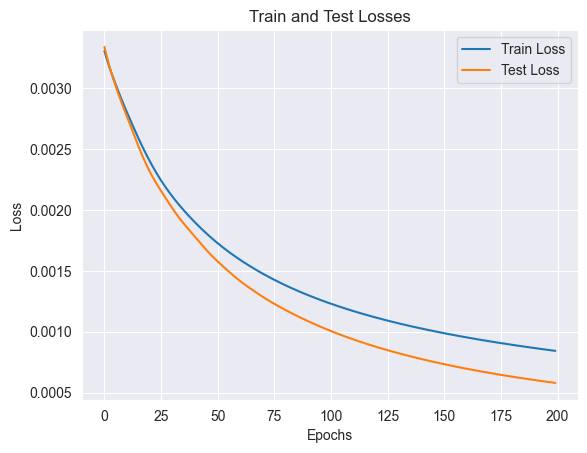

In [47]:
plt.plot(train_loss2, label='Train Loss')
plt.plot(test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

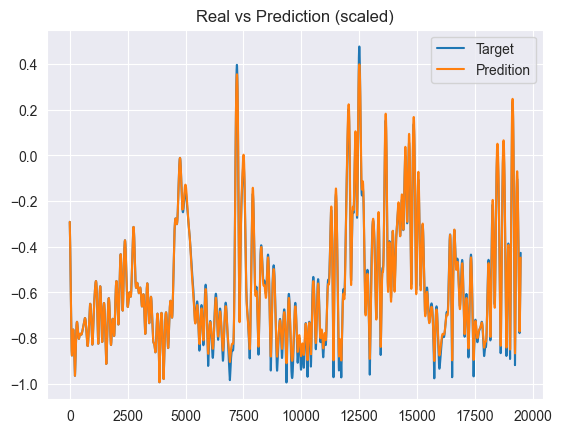

In [48]:
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy()))[int(len(x)*0.6):],label='Target') 
plt.plot(np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy()))[int(len(x)*0.6):],label='Predition')
plt.title('Real vs Prediction (scaled)')
#plt.axvline(int(len(x)*0.8)) 
plt.legend()
plt.show()

In [49]:
#de-scaled data

aux = np.vstack((y_train.detach().numpy(),y_test.detach().numpy()))
aux2 = np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy()))
dtransform_real = scale.inverse_transform(aux)
dtransform_pred = scale.inverse_transform(aux2)


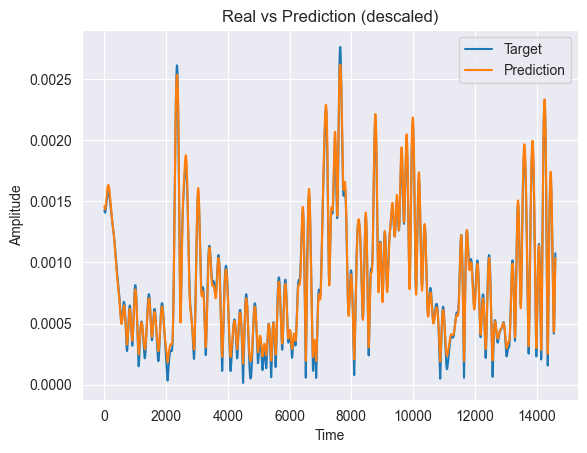

In [50]:
plt.plot(dtransform_real[int(len(x)*0.7):], label='Target')
plt.plot(dtransform_pred[int(len(x)*0.7):], label='Prediction')
plt.title('Real vs Prediction (descaled)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


### **multistep prediction**

In [57]:
x_last = x_train[-1].view(1000)

prediction_val = []

while len(prediction_val)<len(y_test):
    prediction= model(x_last.view(1,1000,1))
    prediction_val.append(prediction[0,0].item())

    x_last = torch.cat((x_last[1:], prediction[0]))

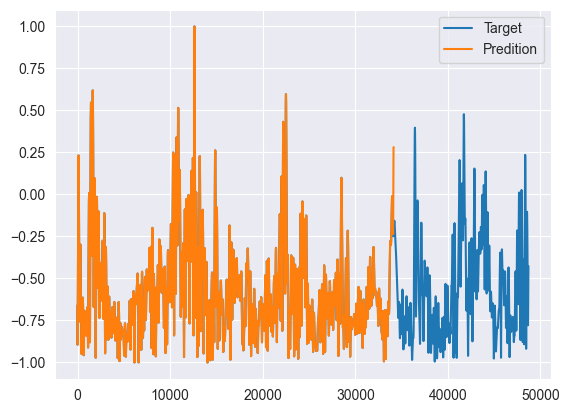

In [ ]:
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy())),label='Target')
plt.plot(np.vstack((y_train.detach().numpy(),np.asarray(prediction_val).reshape(-1,1))),label='Predition')
#plt.axvline(int(len(x)*0.7),color='red')
plt.legend()
plt.show()